The purpose of this notebook is to create several models to predict salary based on key player stats and to compare the different model results.

In [1]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# model specific imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# load the train/test data that was pre-processed in a previous notebook
X_train = pd.read_csv('NBA X_train', index_col=0)
X_test = pd.read_csv('NBA X_test', index_col=0)
y_train = pd.read_csv('NBA y_train', index_col=0)
y_test = pd.read_csv('NBA y_test', index_col=0)

# create a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(116, 45) (39, 45) (52, 45) (116, 1) (39, 1) (52, 1)


In [3]:
# reshape the y data
y_train = y_train['Salary (millions)'].to_numpy()
y_val = y_val['Salary (millions)'].to_numpy()
y_test = y_test['Salary (millions)'].to_numpy()
print(y_train.shape, y_val.shape, y_test.shape)

(116,) (39,) (52,)


In [4]:
# define rmse function

def rmse_func(model, X, y):
    predictions = model.predict(X)
    rmse = np.sqrt(mean_squared_error(predictions, y))
    return(rmse)

# Linear Regression Model

In [5]:
# initiate the linear regression model and fit it to the training data
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict the test set results
y_pred = lm.predict(X_test)

Evaluate the Linear Regression Model

In [6]:
print('The r-squared value is ' + str(r2_score(y_test, y_pred)))
print('The root mean square error is ' + str(rmse_func(lm, X_test, y_test)))
print('The mean absolute error is ' + str(mean_absolute_error(y_pred, y_test)))

The r-squared value is -0.0020774553629308024
The root mean square error is 10.771858867295135
The mean absolute error is 8.616003359311526


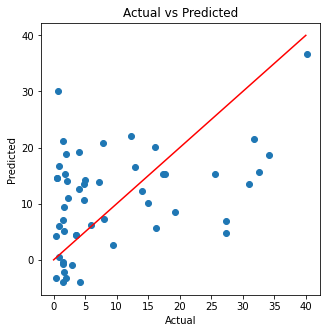

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.plot([0,40], [0,40], 'k-', color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Feature 0: Age, Score: 3.0971941665704654
Feature 1: G, Score: 1.6823808502647848
Feature 2: GS, Score: 3.9040516415180138
Feature 3: MP, Score: -3.67172335329159
Feature 4: FG, Score: 2.619084227323573
Feature 5: FGA, Score: -17.87941095786164
Feature 6: FG%, Score: -2.105874759645216
Feature 7: 3P, Score: 35.36856666136021
Feature 8: 3PA, Score: 8.300483035200383
Feature 9: 3P%, Score: -1.23976707873891
Feature 10: 2P, Score: 42.22094193107198
Feature 11: 2PA, Score: 11.317065922302646
Feature 12: 2P%, Score: -1.0637920153119844
Feature 13: FT, Score: 8.63725886805078
Feature 14: FTA, Score: 6.047109002437306
Feature 15: FT%, Score: 0.9135761612093622
Feature 16: ORB, Score: -29.271968641700138
Feature 17: DRB, Score: -49.11498174736148
Feature 18: TRB, Score: 74.24837797246576
Feature 19: AST, Score: 4.278378396162735
Feature 20: STL, Score: 0.5110462465421729
Feature 21: BLK, Score: 0.7732020460765858
Feature 22: TOV, Score: -0.8487044978943606
Feature 23: PF, Score: -0.94027862174

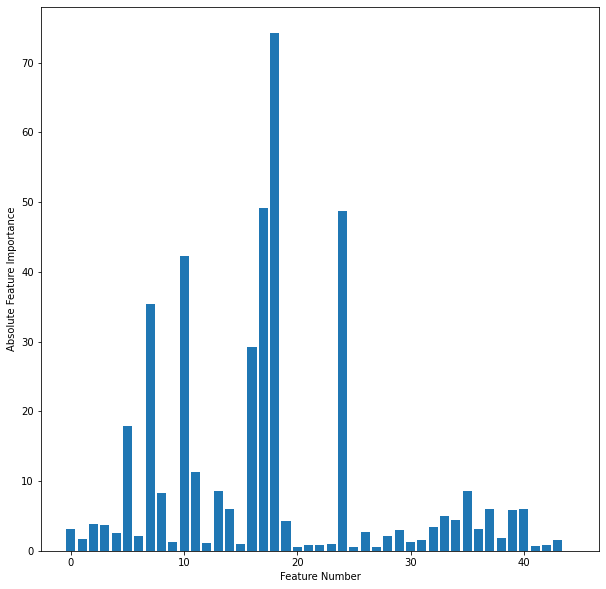

In [8]:
# Determine coefficients
coefs = lm.coef_

# summarize feature importance
for i in range(len(coefs)):
    print('Feature ' + str(i) + ': ' + X_train.columns[i] + ', Score: ' + str(coefs[i]))
    
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(coefs))], abs(coefs))
plt.xlabel('Feature Number')
plt.ylabel('Absolute Feature Importance')
plt.show()

Even as a first attempt, this is not a very good model.  The r squared value is close to 0 and there are several predicted values below 0, meaning a player would be losing money by playing, which is obviously not true.  Ideally, the actual vs predicted plot points would all be on the red line or very near to it.

# Ridge Regression

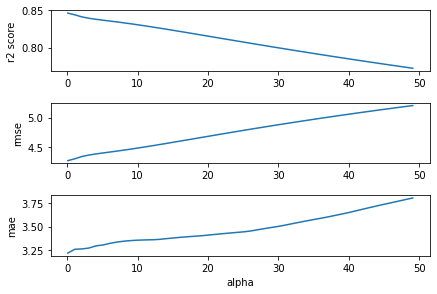

In [9]:
# find optimal alpha value
alphas = np.arange(0.1, 50, 1)
r2_scores = []
rmses = []
maes = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_val)
    r2_scores.append(r2_score(y_val, y_pred))
    rmses.append(rmse_func(ridge, X_val, y_val))
    maes.append(mean_absolute_error(y_pred, y_val))
    
fig, ax = plt.subplots(3, 1)
fig.tight_layout()
plt.xlabel('alpha')

ax[0].plot(alphas, r2_scores)
ax[0].set_ylabel('r2 score')

ax[1].plot(alphas, rmses)
ax[1].set_ylabel('rmse')

ax[2].plot(alphas, maes)
ax[2].set_ylabel('mae')

plt.show()

In [10]:
max_r2 = max(r2_scores)
max_index = r2_scores.index(max_r2)
best_alpha_r2 = alphas[max_index]

min_rmse = min(rmses)
min_index = rmses.index(min_rmse)
best_alpha_rmse = alphas[min_index]

min_mae = min(maes)
min_index = maes.index(min_mae)
best_alpha_mae = alphas[min_index]

print(best_alpha_r2, best_alpha_rmse, best_alpha_mae)

0.1 0.1 0.1


In [11]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

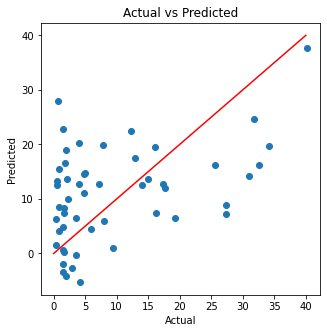

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.plot([0, 40], [0, 40], 'k-', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [13]:
print('The r squared value is ' + str(r2_score(y_test, y_pred)))
print('The root mean square error is ' + str(rmse_func(ridge, X_test, y_test)))
print('The mean absolute error is ' + str(mean_absolute_error(y_pred, y_test)))

The r squared value is 0.04771483169034263
The root mean square error is 10.500827374005986
The mean absolute error is 8.639490917464295


Feature 0: Age, Score: 3.127029311113101
Feature 1: G, Score: 1.4948124864559391
Feature 2: GS, Score: 3.938345701279666
Feature 3: MP, Score: -3.760613007618291
Feature 4: FG, Score: 1.2417121455422564
Feature 5: FGA, Score: -2.573195698519897
Feature 6: FG%, Score: -2.0902456383331782
Feature 7: 3P, Score: 7.203852774678529
Feature 8: 3PA, Score: -1.910518196304102
Feature 9: 3P%, Score: -1.21173507975066
Feature 10: 2P, Score: 8.134786154342464
Feature 11: 2PA, Score: -1.25650790066663
Feature 12: 2P%, Score: -0.6712251849244305
Feature 13: FT, Score: -0.4995266999401698
Feature 14: FTA, Score: 2.0958173467687207
Feature 15: FT%, Score: 0.4420168192344061
Feature 16: ORB, Score: -2.476622961968846
Feature 17: DRB, Score: -2.9322540202388234
Feature 18: TRB, Score: 6.903760776221724
Feature 19: AST, Score: 3.433002092973019
Feature 20: STL, Score: 0.41334130636713257
Feature 21: BLK, Score: 0.6516462939292536
Feature 22: TOV, Score: -0.3999049259831262
Feature 23: PF, Score: -0.88007

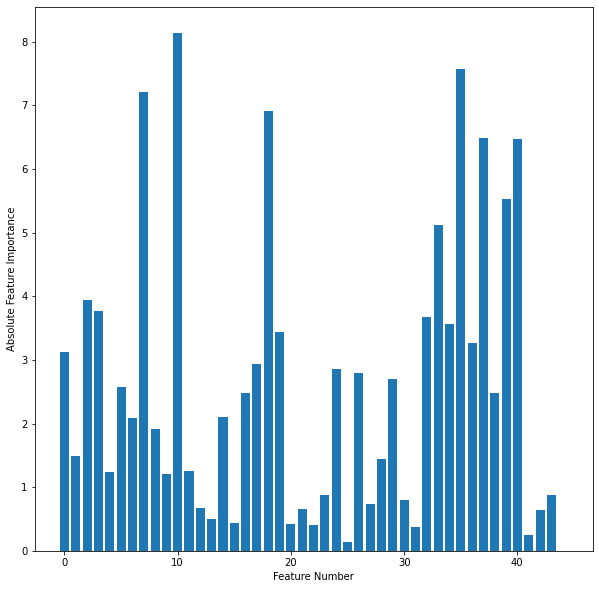

In [14]:
# Determine coefficients
coefs = ridge.coef_

# summarize feature importance
for i in range(len(coefs)):
    print('Feature ' + str(i) + ': ' + X_train.columns[i] + ', Score: ' + str(coefs[i]))
    
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(coefs))], abs(coefs))
plt.xlabel('Feature Number')
plt.ylabel('Absolute Feature Importance')
plt.show()

# Lasso

<ipython-input-15-0dfe864c4dbf>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1268.913568941011, tolerance: 1.3651873115179256
  model = cd_fast.enet_coordinate_descent(


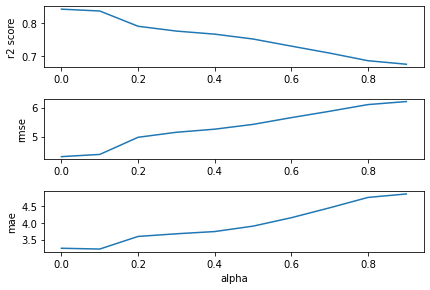

In [15]:
# find optimal alpha value
alphas = np.arange(0, 1, 0.1)
r2_scores = []
rmses = []
maes = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_val)
    r2_scores.append(r2_score(y_val, y_pred))
    rmses.append(rmse_func(lasso, X_val, y_val))
    maes.append(mean_absolute_error(y_pred, y_val))
    
fig, ax = plt.subplots(3, 1)
fig.tight_layout()
plt.xlabel('alpha')

ax[0].plot(alphas, r2_scores)
ax[0].set_ylabel('r2 score')

ax[1].plot(alphas, rmses)
ax[1].set_ylabel('rmse')

ax[2].plot(alphas, maes)
ax[2].set_ylabel('mae')

plt.show()

In [16]:
max_r2 = max(r2_scores)
max_index = r2_scores.index(max_r2)
best_alpha_r2 = alphas[max_index]

min_rmse = min(rmses)
min_index = rmses.index(min_rmse)
best_alpha_rmse = alphas[min_index]

min_mae = min(maes)
min_index = maes.index(min_mae)
best_alpha_mae = alphas[min_index]

print(best_alpha_r2, best_alpha_rmse, best_alpha_mae)

0.0 0.0 0.1


<ipython-input-17-242f7f73eca3>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1268.913568941011, tolerance: 1.3651873115179256
  model = cd_fast.enet_coordinate_descent(


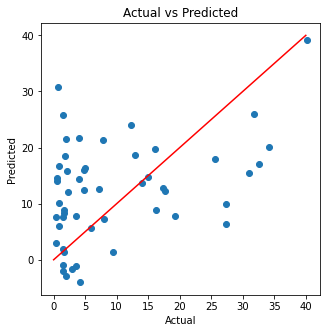

In [17]:
lasso = Lasso(alpha=0)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.plot([0, 40], [0, 40], 'k-', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [18]:
print('The r squared value is ' + str(r2_score(y_test, y_pred)))
print('The root mean square error is ' + str(rmse_func(lasso, X_test, y_test)))
print('The mean absolute error is ' + str(mean_absolute_error(y_pred, y_test)))

The r squared value is -0.07818295185534141
The root mean square error is 11.173422966262681
The mean absolute error is 9.023415060625396


Feature 0: Age, Score: 3.1300613993060917
Feature 1: G, Score: 1.6400872620694378
Feature 2: GS, Score: 4.019532868470718
Feature 3: MP, Score: -3.92924278186714
Feature 4: FG, Score: 7.359035861715582
Feature 5: FGA, Score: 2.0835489567785634
Feature 6: FG%, Score: -2.2812390596027736
Feature 7: 3P, Score: 6.5920923308315515
Feature 8: 3PA, Score: -5.33589084817199
Feature 9: 3P%, Score: -1.2129928787701978
Feature 10: 2P, Score: 5.819928174211205
Feature 11: 2PA, Score: -6.103801865052208
Feature 12: 2P%, Score: -0.6960791060476146
Feature 13: FT, Score: 0.34460224951292073
Feature 14: FTA, Score: 2.537212109222756
Feature 15: FT%, Score: 0.5215407165224029
Feature 16: ORB, Score: -3.3482242673294267
Feature 17: DRB, Score: -4.239821310619489
Feature 18: TRB, Score: 8.872123423192598
Feature 19: AST, Score: 3.475085124594875
Feature 20: STL, Score: 0.41512116216022116
Feature 21: BLK, Score: 0.6784061040938539
Feature 22: TOV, Score: -0.45679070385066567
Feature 23: PF, Score: -0.859

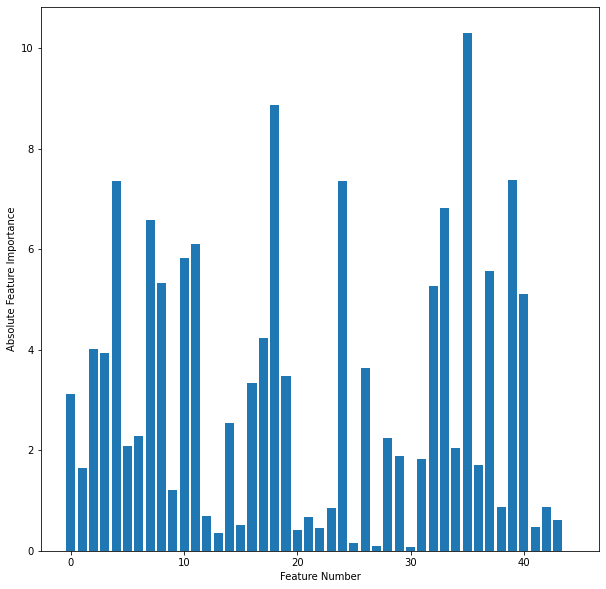

In [19]:
# Determine coefficients
coefs = lasso.coef_

# summarize feature importance
for i in range(len(coefs)):
    print('Feature ' + str(i) + ': ' + X_train.columns[i] + ', Score: ' + str(coefs[i]))
    
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(coefs))], abs(coefs))
plt.xlabel('Feature Number')
plt.ylabel('Absolute Feature Importance')
plt.show()

In general, none of the linear regression models perform very well with this dataset.  They all have very low r-squared values and high RMSE and MAE values relative to the range of salaries in the dataset.

# KNN Regression

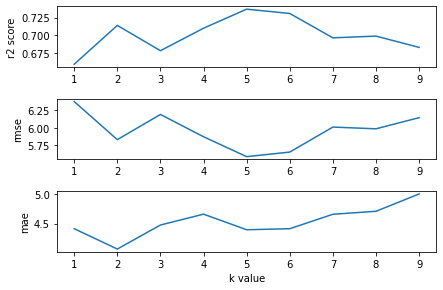

In [20]:
# optimize k
k_vals = np.arange(1, 10, 1)
r2_scores = []
rmses = []
maes = []

for k in k_vals:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    r2_scores.append(r2_score(y_val, y_pred))
    rmses.append(rmse_func(knn, X_val, y_val))
    maes.append(mean_absolute_error(y_pred, y_val))
    
fig, ax = plt.subplots(3, 1)
fig.tight_layout()
plt.xlabel('k value')

ax[0].plot(k_vals, r2_scores)
ax[0].set_ylabel('r2 score')

ax[1].plot(k_vals, rmses)
ax[1].set_ylabel('rmse')

ax[2].plot(k_vals, maes)
ax[2].set_ylabel('mae')

plt.show()

In [21]:
max_r2 = max(r2_scores)
max_index = r2_scores.index(max_r2)
best_k_r2 = k_vals[max_index]

min_rmse = min(rmses)
min_index = rmses.index(min_rmse)
best_k_rmse = k_vals[min_index]

min_mae = min(maes)
min_index = maes.index(min_mae)
best_k_mae = k_vals[min_index]

print(best_k_r2, best_k_rmse, best_k_mae)

5 5 2


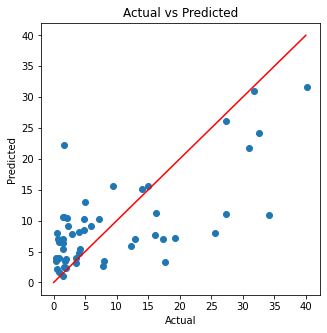

In [22]:
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.plot([0, 40], [0, 40], 'k-', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [23]:
print('The r squared value is ' + str(r2_score(y_test, y_pred)))
print('The root mean square error is ' + str(rmse_func(knn, X_test, y_test)))
print('The mean absolute error is ' + str(mean_absolute_error(y_pred, y_test)))

The r squared value is 0.47230712764370664
The root mean square error is 7.8168292064011755
The mean absolute error is 5.869499472120446


Feature 0: Age, Score: 18.085889131308843
Feature 1: G, Score: 14.147011589338485
Feature 2: GS, Score: 21.761796214456144
Feature 3: MP, Score: 13.852984149203731
Feature 4: FG, Score: 15.506300438821288
Feature 5: FGA, Score: 13.725488817902919
Feature 6: FG%, Score: 12.855031972778056
Feature 7: 3P, Score: 13.520438778192448
Feature 8: 3PA, Score: 13.12380851570353
Feature 9: 3P%, Score: 11.525994963262738
Feature 10: 2P, Score: 14.263151620614105
Feature 11: 2PA, Score: 13.167053271302084
Feature 12: 2P%, Score: 14.12512634308266
Feature 13: FT, Score: 12.181530822716875
Feature 14: FTA, Score: 12.948607503633506
Feature 15: FT%, Score: 12.894752747170443
Feature 16: ORB, Score: 11.795899047723879
Feature 17: DRB, Score: 14.858010137338562
Feature 18: TRB, Score: 14.781069558771907
Feature 19: AST, Score: 15.32511176395179
Feature 20: STL, Score: 13.27026518472581
Feature 21: BLK, Score: 12.011771206697228
Feature 22: TOV, Score: 13.109830541841342
Feature 23: PF, Score: 12.9175164

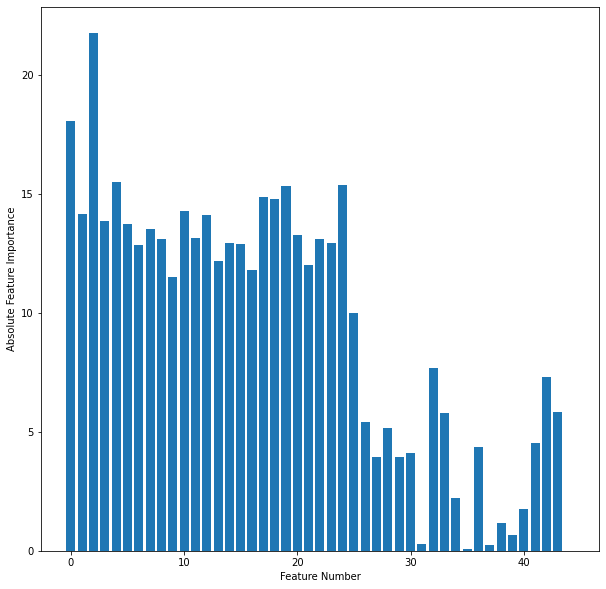

In [24]:
from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(knn, X_train, y_train, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i in range(len(importance)):
    print('Feature ' + str(i) + ': ' + X_train.columns[i] + ', Score: ' + str(importance[i]))
    
# plot feature importance
plt.figure(figsize=(10, 10))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature Number')
plt.ylabel('Absolute Feature Importance')
plt.show()

The KNN model is much better at predicting salaries than the linear regression models.  It is still not a great predictor, but the r-squared value is much higher than before, and the RMSE and MAE are lower.

# RandomForest

In [25]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [26]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=10)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=10, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [27]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [28]:
rf = RandomForestRegressor(n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=60,
                           bootstrap=False, random_state=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

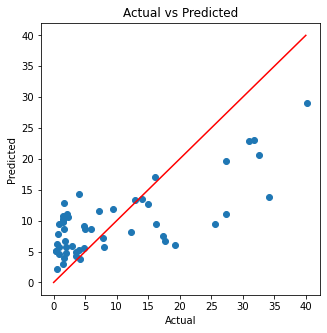

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.plot([0, 40], [0, 40], 'k-', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [30]:
print('The r squared value is ' + str(r2_score(y_test, y_pred)))
print('The root mean square error is ' + str(rmse_func(rf, X_test, y_test)))
print('The mean absolute error is ' + str(mean_absolute_error(y_pred, y_test)))

The r squared value is 0.5043853906704129
The root mean square error is 7.575513190616566
The mean absolute error is 6.05189815222355


Feature 0: Age, Score: 3.98048714031774
Feature 1: G, Score: 0.1627332637399694
Feature 2: GS, Score: 11.09967557641819
Feature 3: MP, Score: 1.47179789988273
Feature 4: FG, Score: 3.119872367084792
Feature 5: FGA, Score: 2.309466581875187
Feature 6: FG%, Score: 0.38021928946958466
Feature 7: 3P, Score: 0.08594546367033894
Feature 8: 3PA, Score: 0.09222893854823513
Feature 9: 3P%, Score: 0.27674576105060966
Feature 10: 2P, Score: 0.9865283895991332
Feature 11: 2PA, Score: 1.3352772190736593
Feature 12: 2P%, Score: 0.18139251615788538
Feature 13: FT, Score: 1.782023098977351
Feature 14: FTA, Score: 1.7581150943943638
Feature 15: FT%, Score: 0.20330429469752018
Feature 16: ORB, Score: 0.15582357986576945
Feature 17: DRB, Score: 1.6198002660458424
Feature 18: TRB, Score: 0.7881937757914816
Feature 19: AST, Score: 2.9302564515537215
Feature 20: STL, Score: 0.19040931759478158
Feature 21: BLK, Score: 0.2572303905383201
Feature 22: TOV, Score: 1.2159660586917607
Feature 23: PF, Score: 1.1193

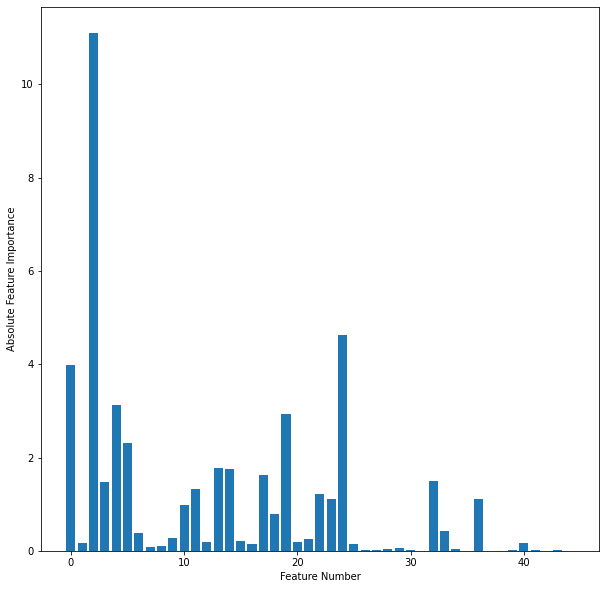

In [31]:
# perform permutation importance
results = permutation_importance(rf, X_train, y_train, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i in range(len(importance)):
    print('Feature ' + str(i) + ': ' + X_train.columns[i] + ', Score: ' + str(importance[i]))
    
# plot feature importance
plt.figure(figsize=(10, 10))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature Number')
plt.ylabel('Absolute Feature Importance')
plt.show()

# Results

The random forest model and the KNN model had similar results, much better than the linear regression models. The random forest model can be considered marginally better than the KNN model because it has a slightly higher r-squared value and the same RMSE value, even though it has a slightly higher MAE.

In a situation where more data was available, KNN might perform better becuase it would be expected that point clusters would be more dense and closer neighbors could be selected.